In [1]:
#Importing Libraries
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from ast import literal_eval
import os

In [2]:
# Get the current directory
current_dir = os.getcwd()
# Construct the relative file path based on the current directory
folder_path_instances = os.path.join(current_dir, 'Data', 'Instances', 'Warmsen')

# Read the CSV file using the relative file path
po_warmsen = pd.read_csv(folder_path_instances + '/post_order_id_mapping.dat', sep='\t', names=('PostObjectId', 'RoutePosID'))
pp_warmsen = pd.read_csv(folder_path_instances + '/post_point_information.dat', sep='\t', names=('PostPointId', 'PostObjectId'))

In [3]:
print(po_warmsen.head(10))

   PostObjectId                        RoutePosID
0            16  AD14E08623FF9F5AD2293E7DEDB4F4B1
1            17  F48CB0CAB0BC117AE030007F0100574C
2            18  F48CB0CAB0C7117AE030007F0100574C
3            19  F48CB0CAB0C8117AE030007F0100574C
4            20  069AE286923C1800E040400A09131416
5            21  F48CB0CAB0BF117AE030007F0100574C
6            22  F48CB0CAB0C0117AE030007F0100574C
7            23  F48CB0CAB0C1117AE030007F0100574C
8            24  F48CB0CAB0C3117AE030007F0100574C
9            25  F48CB0CAB0C4117AE030007F0100574C


In [4]:
print(pp_warmsen.head(10))

   PostPointId PostObjectId
0            0     [0, 113]
1            1          [1]
2            2          [2]
3            3          [3]
4            4          [4]
5            5          [5]
6            6          [6]
7            7          [7]
8            8     [8, 811]
9            9          [9]


In [5]:
# Convert 'PostObjectId' column from string to list
pp_warmsen['PostObjectId'] = pp_warmsen['PostObjectId'].apply(literal_eval)

# Use explode() to split the "PostObjectId" column into different rows
pp_warmsen = pp_warmsen.explode('PostObjectId', ignore_index=True)
print(pp_warmsen.head(10))

   PostPointId PostObjectId
0            0            0
1            0          113
2            1            1
3            2            2
4            3            3
5            4            4
6            5            5
7            6            6
8            7            7
9            8            8


In [6]:
# Merge post_order_id_mapping.dat and post_point_information.dat using 'RoutePosID' as the common column
merged_data = pd.merge(pp_warmsen, po_warmsen, on='PostObjectId', how = 'outer')
print(merged_data.head(10))

   PostPointId PostObjectId                        RoutePosID
0            0            0                               NaN
1            0          113  8EF65E046B44CD28F98B943FAF4E10C0
2            1            1                               NaN
3            2            2                               NaN
4            3            3                               NaN
5            4            4                               NaN
6            5            5                               NaN
7            6            6                               NaN
8            7            7                               NaN
9            8            8                               NaN


In [7]:
# Define a list of file paths for multiple data sets
folder_path_volumes = os.path.join(current_dir, 'Data', 'Volumes')
dfs = []

for file_name in os.listdir(folder_path_volumes):
    if file_name.endswith('.csv'): # Check if the file has .csv extension
        file_path = os.path.join(folder_path_volumes, file_name) # Create full file
        df = pd.read_csv(file_path, sep=';')
        df = df.rename(columns={'ROUTEPOS_ID': 'RoutePosID',
                                'BRIEFE': 'Letters',
                                'PAKETE': 'Packets',
                                'SONSTIGE': 'Others'})

        day = file_path[-6:-4]
        df['Days'] = day
        dfs.append(df)

volumes_dp = pd.concat(dfs, ignore_index=True)
print(volumes_dp)

                               RoutePosID  Letters  Packets  Others Days
0        61ADE0B658BD7433E040400A0913386C  1.38250  0.16450   0.085   di
1        6F994C12508952C82A3BD63E30AA0606  1.38250  0.16450   0.085   di
2        D6590A6EA73C629B096242214AB6FA85  1.38250  0.16450   0.085   di
3        00F6207EED20EAE0E040007F01000C8B  0.78375  0.23125   0.100   di
4        30B7851A725D50BBE040400A09130368  0.78375  0.23125   0.100   di
...                                   ...      ...      ...     ...  ...
5281936  F48CB0CD5303117AE030007F0100574C  1.05200  0.27000   0.512   sa
5281937  F48CB0CD5304117AE030007F0100574C  1.05200  0.27000   0.512   sa
5281938  F48CB0CD5305117AE030007F0100574C  1.05200  0.27000   0.512   sa
5281939  F48CB0CD5306117AE030007F0100574C  1.05200  0.27000   0.512   sa
5281940  F48CB0CD5307117AE030007F0100574C  1.05200  0.27000   0.512   sa

[5281941 rows x 5 columns]


In [8]:
#extracting only warmsen data from the volume database
merged_data = pd.merge(merged_data, volumes_dp, on='RoutePosID', how='left')
print(merged_data.head(10))

   PostPointId PostObjectId                        RoutePosID   Letters  \
0            0            0                               NaN       NaN   
1            0          113  8EF65E046B44CD28F98B943FAF4E10C0  0.926250   
2            0          113  8EF65E046B44CD28F98B943FAF4E10C0  1.276250   
3            0          113  8EF65E046B44CD28F98B943FAF4E10C0  1.147500   
4            0          113  8EF65E046B44CD28F98B943FAF4E10C0  1.174375   
5            0          113  8EF65E046B44CD28F98B943FAF4E10C0  0.196250   
6            0          113  8EF65E046B44CD28F98B943FAF4E10C0  0.196250   
7            0          113  8EF65E046B44CD28F98B943FAF4E10C0  1.051250   
8            1            1                               NaN       NaN   
9            2            2                               NaN       NaN   

    Packets    Others Days  
0       NaN       NaN  NaN  
1  0.187500  0.326250   di  
2  0.163750  0.190000   do  
3  0.143125  0.498125   fr  
4  0.211250  0.347500   mi  


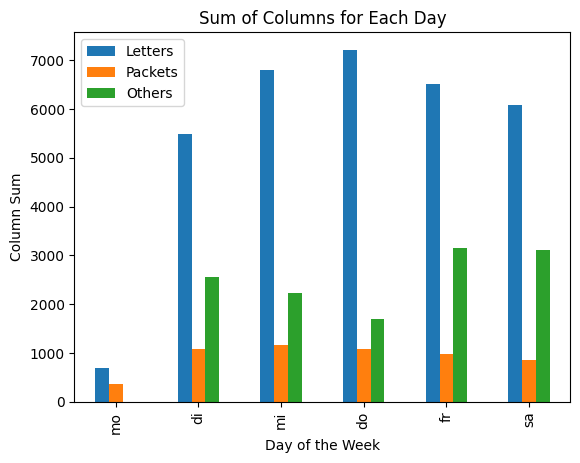

In [9]:
desired_order = ['mo', 'di', 'mi', 'do', 'fr', 'sa']
# Group the combined dataframe by day of the week and calculate the sum for multiple columns
column_sum_df = merged_data.groupby('Days')[['Letters', 'Packets', 'Others']].sum()
column_sum_df = column_sum_df.reindex(desired_order)
# Plot the column sum dataframe in a bar graph
column_sum_df.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Sum of Columns for Each Day')
plt.xlabel('Day of the Week')
plt.ylabel('Column Sum')

# Show the plot
plt.show()

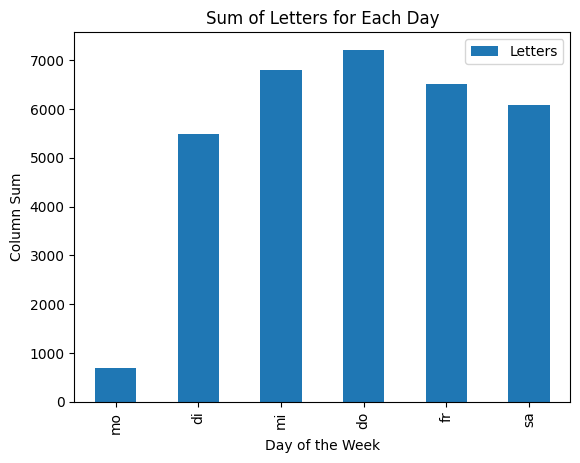

In [10]:
desired_order = ['mo', 'di', 'mi', 'do', 'fr', 'sa']
# Group the combined dataframe by day of the week and calculate the sum for multiple columns
letters_sum_df = merged_data.groupby('Days')[['Letters']].sum()
letters_sum_df = letters_sum_df.reindex(desired_order)
# Plot the column sum dataframe in a bar graph
letters_sum_df.plot(kind='bar')

# Set the plot title and axis labels
plt.title('Sum of Letters for Each Day')
plt.xlabel('Day of the Week')
plt.ylabel('Column Sum')

# Show the plot
plt.show()

In [11]:
folder_path_district = os.path.join(current_dir, 'Data', 'Instances', 'Warmsen', 'Districts')

# Create an empty dictionary to store the DataFrames
district = {}

# Loop through all files in the folder
for file_name in os.listdir(folder_path_district):
    if file_name.endswith('.dat'):  # Check if the file has .csv extension
        file_path = os.path.join(folder_path_district, file_name)  # Create full file path
        df = pd.read_csv(file_path, sep='\t', header=None, skiprows=[0])  # Read CSV file into a DataFrame

        start_point = df.iloc[0, 1]
        end_point   = df.iloc[0, 2]
        route       = df.iloc[1:, 0].values.tolist()

        variable_name = file_name.split('.')[0]  # Extract variable name from file name
        district[variable_name] = pd.DataFrame({'Route' : [start_point] + route + [end_point]})
        district[variable_name] = pd.merge(district[variable_name], pp_warmsen, left_on='Route', right_on='PostObjectId', how='left')
        district[variable_name] = district[variable_name].drop('PostObjectId', axis = 1)

print(district['31603-08'])

    Route  PostPointId
0       4            4
1    3207         3042
2    3208         3043
3    3558         3367
4    3560         3369
..    ...          ...
383  3326         3153
384  3327         3154
385  3328         3155
386  3320         3147
387  4194         3960

[388 rows x 2 columns]


In [12]:
folder_path_distance = os.path.join(current_dir, 'Data', 'Instances', 'Warmsen', 'distances')

# Create an empty dictionary to store the DataFrames
dfs = []

# Loop through all files in the folder
for file_name in os.listdir(folder_path_distance):
    if file_name.endswith('.dat'):  # Check if the file has .csv extension
        file_path = os.path.join(folder_path_distance, file_name)  # Create full file path
        df = pd.read_csv(file_path, sep=',', header=None, names=('Point1', 'Point2', 'Distance'))  # Read CSV file into a DataFrame

        dfs.append(df)

distances = pd.concat(dfs, axis=0, ignore_index=True)
print(distances)

         Point1  Point2  Distance
0           698     698      0.00
1           698     699   5038.87
2           698     700    867.73
3           698     701    882.26
4           698     696     53.95
...         ...     ...       ...
1968391      28     324   4304.94
1968392      28     107   3949.98
1968393      28     108   3410.13
1968394      28     109   3433.97
1968395      28      28      0.00

[1968396 rows x 3 columns]


In [13]:
#Initializaing a distance matrix

row = distances['Point1'].max()
column = distances['Point2'].max()
print("row:",row,"column:",column)
distance_matrix = np.full((row+1, column+1), -5000000.0 ,dtype=float)  #Makes debugging easier
print(distance_matrix)

row: 5225 column: 5225
[[-5000000. -5000000. -5000000. ... -5000000. -5000000. -5000000.]
 [-5000000. -5000000. -5000000. ... -5000000. -5000000. -5000000.]
 [-5000000. -5000000. -5000000. ... -5000000. -5000000. -5000000.]
 ...
 [-5000000. -5000000. -5000000. ... -5000000. -5000000. -5000000.]
 [-5000000. -5000000. -5000000. ... -5000000. -5000000. -5000000.]
 [-5000000. -5000000. -5000000. ... -5000000. -5000000. -5000000.]]


In [14]:
for index , row in distances.iterrows():
    frm_pt = int(row['Point1'])
    to_pt = int(row['Point2'])
    dist = row['Distance']
    distance_matrix[frm_pt , to_pt] = dist

print(distance_matrix)

[[ 0.0000e+00 -5.0000e+06 -5.0000e+06 ... -5.0000e+06 -5.0000e+06
  -5.0000e+06]
 [-5.0000e+06 -5.0000e+06 -5.0000e+06 ... -5.0000e+06 -5.0000e+06
  -5.0000e+06]
 [-5.0000e+06 -5.0000e+06 -5.0000e+06 ... -5.0000e+06 -5.0000e+06
  -5.0000e+06]
 ...
 [-5.0000e+06 -5.0000e+06 -5.0000e+06 ...  0.0000e+00  2.2962e+02
   2.9988e+02]
 [-5.0000e+06 -5.0000e+06 -5.0000e+06 ...  2.2962e+02  0.0000e+00
   1.4152e+02]
 [-5.0000e+06 -5.0000e+06 -5.0000e+06 ...  3.0431e+02  1.4152e+02
   0.0000e+00]]


In [15]:
def find_tour_len(df , distance_matrix):
    # Convert the "Column1" values to a list
    route_list = df['PostPointId'].tolist()
    tour_len = 0 
    max_len = [] 
    for i in range(len(route_list)-1):
        from_pt = route_list[i] 
        to_pt   = route_list[i+1]
        print(f'frm_pt : {from_pt} , to_pt : {to_pt} , Distance : {distance_matrix[from_pt , to_pt]} ')
        if(distance_matrix[from_pt , to_pt] < 0):
            print(f"from_pt : {from_pt} , to_pt : {to_pt}")
        tour_len += distance_matrix[from_pt , to_pt]
        max_len.append(distance_matrix[from_pt , to_pt])
    max_len.sort(reverse=True)
    print(max_len)
    return tour_len
    



In [16]:
#finding the tour length of the all the districts
print(folder_path_district)
district_list = os.listdir(folder_path_district)
district_list = [i[:-4] for i in district_list]
#print(district_list)
district_list_tour_length = {}
district_list_tour_length['31600-01'] = find_tour_len( district['31600-01'], distance_matrix)
# for i in district_list:
#     print(i)
#     #print(district[i])
#     district_list_tour_length[i] = find_tour_len( district[i], distance_matrix)
print(district_list_tour_length)

c:\Users\akshay\Documents\analytics project\AOP_DP_Analytics\AOP_DP_Analytics\AnalyticsProject\Data\Instances\Warmsen\Districts
frm_pt : 0 , to_pt : 698 , Distance : -5000000.0 
from_pt : 0 , to_pt : 698
frm_pt : 698 , to_pt : 699 , Distance : 5038.87 
frm_pt : 699 , to_pt : 700 , Distance : 5045.459999999999 
frm_pt : 700 , to_pt : 701 , Distance : 14.53 
frm_pt : 701 , to_pt : 696 , Distance : 828.3500000000001 
frm_pt : 696 , to_pt : 697 , Distance : 42.57 
frm_pt : 697 , to_pt : 695 , Distance : 5033.8 
frm_pt : 695 , to_pt : 620 , Distance : 4557.16 
frm_pt : 620 , to_pt : 621 , Distance : 16.18 
frm_pt : 621 , to_pt : 622 , Distance : 5187.259999999998 
frm_pt : 622 , to_pt : 623 , Distance : 48.67 
frm_pt : 623 , to_pt : 619 , Distance : 5237.44 
frm_pt : 619 , to_pt : 618 , Distance : 24.01 
frm_pt : 618 , to_pt : 453 , Distance : 1352.9600000000005 
frm_pt : 453 , to_pt : 452 , Distance : 4.52 
frm_pt : 452 , to_pt : 454 , Distance : 9475.100000000026 
frm_pt : 454 , to_pt : 4